KAGGLE USERNAME: Muhammad Hassan Zindani/Mr Zindani

In [11]:
!pip install matplotlib

In [12]:
!pip install seaborn

In [13]:
!pip install scikit-learn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option("display.max_columns",None)

UNDERSTANDING THE DATA

In [3]:
import pandas as pd

data_train = pd.read_csv(r"C:\Users\Hassan\Desktop\21282193_ML PROJECT\21282193_ML_Project\train.csv")
data_test = pd.read_csv(r"C:\Users\Hassan\Desktop\21282193_ML PROJECT\21282193_ML_Project\test.csv")


In [16]:
#CHECKING DATA VALUES AND NUMBER OF COLUMNS 
print(data_train.shape)
print(data_test.shape)

(10000, 25)
(3203, 24)


In [17]:
#CHECKING NULL VALUES
print(data_train.isnull().sum())
print(data_test.isnull().sum())

ID                                 0
Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64
ID                                 0
Tank Failure Pressure (ba

STANDARDIZING COLUMN NAMES

In [18]:
#ELIMINATING SPACES AND ADDING UNDERSCORES FOR FURTHER STANDARDIZED DATA
data_train.columns = data_train.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data_test.columns = data_test.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(data_train.columns)
print(data_test.columns)

Index(['ID', 'Tank_Failure_Pressure_bar', 'Liquid_Ratio_%', 'Tank_Width_m',
       'Tank_Length_m', 'Tank_Height_m', 'BLEVE_Height_m', 'Vapour_Height_m',
       'Vapour_Temperature_K', 'Liquid_Temperature_K',
       'Obstacle_Distance_to_BLEVE_m', 'Obstacle_Width_m', 'Obstacle_Height_m',
       'Obstacle_Thickness_m', 'Obstacle_Angle', 'Status',
       'Liquid_Critical_Pressure_bar', 'Liquid_Boiling_Temperature_K',
       'Liquid_Critical_Temperature_K', 'Sensor_ID', 'Sensor_Position_Side',
       'Sensor_Position_x', 'Sensor_Position_y', 'Sensor_Position_z',
       'Target_Pressure_bar'],
      dtype='object')
Index(['ID', 'Tank_Failure_Pressure_bar', 'Liquid_Ratio_%', 'Tank_Width_m',
       'Tank_Length_m', 'Tank_Height_m', 'BLEVE_Height_m', 'Vapour_Height_m',
       'Vapour_Temperature_K', 'Liquid_Temperature_K',
       'Obstacle_Distance_to_BLEVE_m', 'Obstacle_Width_m', 'Obstacle_Height_m',
       'Obstacle_Thickness_m', 'Obstacle_Angle', 'Status',
       'Liquid_Critical_Pressure_

DISTRIBUTION OF DATASET 

In [19]:
# TYPES OF COUNT AND VALUES FOR TRAIN DATA
print(data_train['Status'].value_counts())
print(data_train['Sensor_Position_Side'].value_counts())
print(data_train['Liquid_Critical_Temperature_K'].value_counts())
print(data_train['Liquid_Boiling_Temperature_K'].value_counts())
print(data_train['Liquid_Critical_Pressure_bar'].value_counts())
print(data_train['Sensor_ID'].value_counts())

Status
Subcooled      6318
Superheated    3682
Name: count, dtype: int64
Sensor_Position_Side
2    3331
1    3330
3    1113
4    1113
5    1113
Name: count, dtype: int64
Liquid_Critical_Temperature_K
152.0    5221
96.7     4779
Name: count, dtype: int64
Liquid_Boiling_Temperature_K
-1     5221
-42    4779
Name: count, dtype: int64
Liquid_Critical_Pressure_bar
37.9    5221
42.5    4779
Name: count, dtype: int64
Sensor_ID
18    371
24    371
19    371
26    371
25    371
27    371
23    371
22    371
21    371
20    371
9     370
16    370
15    370
14    370
13    370
12    370
11    370
10    370
4     370
8     370
7     370
6     370
5     370
3     370
2     370
1     370
17    370
Name: count, dtype: int64


In [20]:
# TYPES OF COUNT AND VALUES FOR TEST DATA
print(data_test['Status'].value_counts())
print(data_test['Sensor_Position_Side'].value_counts())
print(data_test['Liquid_Critical_Temperature_K'].value_counts())
print(data_test['Liquid_Boiling_Temperature_K'].value_counts())
print(data_test['Liquid_Critical_Pressure_bar'].value_counts())
print(data_test['Sensor_ID'].value_counts())

Status
Subcooled      1890
Superheated    1313
Name: count, dtype: int64
Sensor_Position_Side
1    1071
2    1070
3     354
4     354
5     354
Name: count, dtype: int64
Liquid_Critical_Temperature_K
152.0    1664
96.7     1539
Name: count, dtype: int64
Liquid_Boiling_Temperature_K
-1     1664
-42    1539
Name: count, dtype: int64
Liquid_Critical_Pressure_bar
37.9    1664
42.5    1539
Name: count, dtype: int64
Sensor_ID
1     119
10    119
17    119
16    119
15    119
2     119
13    119
12    119
11    119
14    119
9     119
7     119
6     119
5     119
4     119
3     119
8     119
23    118
26    118
25    118
24    118
19    118
22    118
21    118
20    118
18    118
27    118
Name: count, dtype: int64


CORRELATION

In [21]:
# CORRELATION FOR TRAIN DATASET
correlation = data_train.corr(method='pearson',numeric_only=True)
correlation.style.background_gradient(cmap='coolwarm').format('{:.2f}')

In [22]:
# CORRELATION FOR TEST DATASET
correlation = data_test.corr(method='pearson',numeric_only=True)
correlation.style.background_gradient(cmap='coolwarm').format('{:.2f}')

CONVERSION OF THE DATA TYPE
: ONE HOT ENCODING

In [23]:
#CATEGORICAL VARIABLES
cat_variables = ['Status', 'Sensor_Position_Side', 'Liquid_Critical_Temperature_K', 'Liquid_Boiling_Temperature_K', 'Liquid_Critical_Pressure_bar', 'Sensor_ID']

#PERFORMING ONE HOT ENCODING
encoded_train_1 = pd.get_dummies(data_train, columns=cat_variables)

#DUMMY VARIABLES TO INTEGERS
for column in encoded_train_1.columns:
    if column.startswith(tuple(cat_variables)):
        encoded_train_1[column] = encoded_train_1[column].astype(int)

#VERIFYING APPLICATION
print(encoded_train_1.head())

     ID  Tank_Failure_Pressure_bar  Liquid_Ratio_%  Tank_Width_m  \
0  3203                        7.3          0.4158           2.4   
1  3204                        7.3          0.4158           2.4   
2  3205                        7.3          0.4158           2.4   
3  3206                        7.3          0.4158           2.4   
4  3207                        7.3          0.4158           2.4   

   Tank_Length_m  Tank_Height_m  BLEVE_Height_m  Vapour_Height_m  \
0            5.4            1.0             1.8              0.6   
1            5.4            1.0             1.8              0.6   
2            5.4            1.0             1.8              0.6   
3            5.4            1.0             1.8              0.6   
4            5.4            1.0             1.8              0.6   

   Vapour_Temperature_K  Liquid_Temperature_K  Obstacle_Distance_to_BLEVE_m  \
0                 522.8                 354.3                            11   
1                 522.8 

In [24]:
#DATA TYPES FOR TRAIN DATASET
encoded_train_1.dtypes

ID                                       int64
Tank_Failure_Pressure_bar              float64
Liquid_Ratio_%                         float64
Tank_Width_m                           float64
Tank_Length_m                          float64
Tank_Height_m                          float64
BLEVE_Height_m                         float64
Vapour_Height_m                        float64
Vapour_Temperature_K                   float64
Liquid_Temperature_K                   float64
Obstacle_Distance_to_BLEVE_m             int64
Obstacle_Width_m                         int64
Obstacle_Height_m                        int64
Obstacle_Thickness_m                   float64
Obstacle_Angle                           int64
Sensor_Position_x                      float64
Sensor_Position_y                      float64
Sensor_Position_z                      float64
Target_Pressure_bar                    float64
Status_Subcooled                         int32
Status_Superheated                       int32
Sensor_Positi

In [25]:
#CATEGORICAL VARIABLES
cat_variables = ['Status', 'Sensor_Position_Side', 'Liquid_Critical_Temperature_K', 'Liquid_Boiling_Temperature_K', 'Liquid_Critical_Pressure_bar', 'Sensor_ID']

#ONE HOT ENCODING
encoded_test_1 = pd.get_dummies(data_test, columns=cat_variables)

#CONVERTING DUMMY VARIABLES TO INTEGERS
for column in encoded_test_1.columns:
    if column.startswith(tuple(cat_variables)):
        encoded_test_1[column] = encoded_test_1[column].astype(int)

#VERIFYING APPLICATION OF ONE HOT ENCODING
print(encoded_test_1.head())

   ID  Tank_Failure_Pressure_bar  Liquid_Ratio_%  Tank_Width_m  Tank_Length_m  \
0   0                       16.8        0.336426           2.8            8.6   
1   1                       16.8        0.336426           2.8            8.6   
2   2                       16.8        0.336426           2.8            8.6   
3   3                       16.8        0.336426           2.8            8.6   
4   4                       16.8        0.336426           2.8            8.6   

   Tank_Height_m  BLEVE_Height_m  Vapour_Height_m  Vapour_Temperature_K  \
0            2.2             0.4              1.6                 389.9   
1            2.2             0.4              1.6                 389.9   
2            2.2             0.4              1.6                 389.9   
3            2.2             0.4              1.6                 389.9   
4            2.2             0.4              1.6                 389.9   

   Liquid_Temperature_K  Obstacle_Distance_to_BLEVE_m  Obstacl

In [26]:
#DATA TYPES FOR TEST DATASET
encoded_test_1.dtypes

ID                                       int64
Tank_Failure_Pressure_bar              float64
Liquid_Ratio_%                         float64
Tank_Width_m                           float64
Tank_Length_m                          float64
Tank_Height_m                          float64
BLEVE_Height_m                         float64
Vapour_Height_m                        float64
Vapour_Temperature_K                   float64
Liquid_Temperature_K                   float64
Obstacle_Distance_to_BLEVE_m             int64
Obstacle_Width_m                         int64
Obstacle_Height_m                        int64
Obstacle_Thickness_m                   float64
Obstacle_Angle                           int64
Sensor_Position_x                      float64
Sensor_Position_y                      float64
Sensor_Position_z                      float64
Status_Subcooled                         int32
Status_Superheated                       int32
Sensor_Position_Side_1                   int32
Sensor_Positi

TARGET VARIABLES REORDERING 

In [27]:
#ECTRACTING COLUMN NAMES
columns = encoded_train_1.columns.tolist()

#DELETING Target_Pressure_bar
columns.remove("Target_Pressure_bar")

#USING APPEND TO ADD Target_Pressure_bar TO THE END
columns.append("Target_Pressure_bar")

#REORDERING NEW COLUMNS IN THE DATAFRAME
encoded_train_1 = encoded_train_1[columns]

#VERIFYING Target_Pressure_bar IS AT THE END
encoded_train_1.dtypes


ID                                       int64
Tank_Failure_Pressure_bar              float64
Liquid_Ratio_%                         float64
Tank_Width_m                           float64
Tank_Length_m                          float64
Tank_Height_m                          float64
BLEVE_Height_m                         float64
Vapour_Height_m                        float64
Vapour_Temperature_K                   float64
Liquid_Temperature_K                   float64
Obstacle_Distance_to_BLEVE_m             int64
Obstacle_Width_m                         int64
Obstacle_Height_m                        int64
Obstacle_Thickness_m                   float64
Obstacle_Angle                           int64
Sensor_Position_x                      float64
Sensor_Position_y                      float64
Sensor_Position_z                      float64
Status_Subcooled                         int32
Status_Superheated                       int32
Sensor_Position_Side_1                   int32
Sensor_Positi

TARGET VARIABLES AND LOG

In [28]:
import numpy as np
import pandas as pd

#DEFINE THE TARGET VARIABLE 'TARGET PRESSURE (BAR)'
y = encoded_train_1['Target_Pressure_bar']

#TAKE THE LOG 
y_log = np.log(y)

#ADD THE LOG TRANSFORMED TARGET VARIABLE
encoded_train_1['Target_Pressure_log'] = y_log

#DROP TARGET PRESSURE
encoded_train_1 = encoded_train_1.drop('Target_Pressure_bar', axis= 1)

In [29]:
#CALCULATE Q1
Q1 = encoded_train_1['Target_Pressure_log'].quantile(0.25)

#CALCULATE Q3
Q3 = encoded_train_1['Target_Pressure_log'].quantile(0.75)

#CALCULATE IQR
IQR = Q3 - Q1

#DEFINE THE LOWER BOUND AS 1.5 TIMES THE IQR BELOW Q1
lower_bound = Q1 - 1.5 * IQR

#DEFINE THE UPPER BOUND AS 1.5 TIMES THE IQR ABOVE Q3
upper_bound = Q3 + 1.5 * IQR

#COUNT THE NUMBER OF OUTLIERS
outliers_count = ((encoded_train_1['Target_Pressure_log'] < lower_bound) | (encoded_train_1['Target_Pressure_log'] > upper_bound)).sum()

print("Number of outliers:", outliers_count)

Number of outliers: 46


In [30]:
#CALCULATE Q1
Q1 = encoded_train_1['Target_Pressure_log'].quantile(0.25)

#CALCULATE Q3
Q3 = encoded_train_1['Target_Pressure_log'].quantile(0.75)

#CALCULATE IQR
IQR = Q3 - Q1

#DEFINE THE LOWER AND UPPER BOUNDS 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#DROP OUTLIERS
encoded_train_1 = encoded_train_1[(encoded_train_1['Target_Pressure_log'] >= lower_bound) & (encoded_train_1['Target_Pressure_log'] <= upper_bound)]

In [31]:
#CALCULATE THE SIZE OF THE DATAFRAME
size_after = encoded_train_1.shape[0]

print("Size of DataFrame after removing outliers:", size_after)

Size of DataFrame after removing outliers: 9954


In [32]:
#GET THE COLUMN NAMES
column_names = encoded_train_1.columns

print("Column names:", column_names)

Column names: Index(['ID', 'Tank_Failure_Pressure_bar', 'Liquid_Ratio_%', 'Tank_Width_m',
       'Tank_Length_m', 'Tank_Height_m', 'BLEVE_Height_m', 'Vapour_Height_m',
       'Vapour_Temperature_K', 'Liquid_Temperature_K',
       'Obstacle_Distance_to_BLEVE_m', 'Obstacle_Width_m', 'Obstacle_Height_m',
       'Obstacle_Thickness_m', 'Obstacle_Angle', 'Sensor_Position_x',
       'Sensor_Position_y', 'Sensor_Position_z', 'Status_Subcooled',
       'Status_Superheated', 'Sensor_Position_Side_1',
       'Sensor_Position_Side_2', 'Sensor_Position_Side_3',
       'Sensor_Position_Side_4', 'Sensor_Position_Side_5',
       'Liquid_Critical_Temperature_K_96.7',
       'Liquid_Critical_Temperature_K_152.0',
       'Liquid_Boiling_Temperature_K_-42', 'Liquid_Boiling_Temperature_K_-1',
       'Liquid_Critical_Pressure_bar_37.9',
       'Liquid_Critical_Pressure_bar_42.5', 'Sensor_ID_1', 'Sensor_ID_2',
       'Sensor_ID_3', 'Sensor_ID_4', 'Sensor_ID_5', 'Sensor_ID_6',
       'Sensor_ID_7', 'Sensor_I

In [33]:
#CALCULATING VOLUMES ON TRAIN DATASET
#TANK VOLUME
encoded_train_1['Tank_Volume'] = encoded_train_1['Tank_Width_m'] * encoded_train_1['Tank_Length_m'] * encoded_train_1['Tank_Height_m']
#OBSTACLE VOLUME
encoded_train_1['Obstacle_Volume'] = encoded_train_1['Obstacle_Width_m'] * encoded_train_1['Obstacle_Thickness_m'] * encoded_train_1['Obstacle_Height_m']

#CHECKING RENAMED encoded_train_1
print(encoded_train_1.head())

     ID  Tank_Failure_Pressure_bar  Liquid_Ratio_%  Tank_Width_m  \
0  3203                        7.3          0.4158           2.4   
1  3204                        7.3          0.4158           2.4   
2  3205                        7.3          0.4158           2.4   
3  3206                        7.3          0.4158           2.4   
4  3207                        7.3          0.4158           2.4   

   Tank_Length_m  Tank_Height_m  BLEVE_Height_m  Vapour_Height_m  \
0            5.4            1.0             1.8              0.6   
1            5.4            1.0             1.8              0.6   
2            5.4            1.0             1.8              0.6   
3            5.4            1.0             1.8              0.6   
4            5.4            1.0             1.8              0.6   

   Vapour_Temperature_K  Liquid_Temperature_K  Obstacle_Distance_to_BLEVE_m  \
0                 522.8                 354.3                            11   
1                 522.8 

In [34]:
#TRANSFORMING VOLUMES INTO LOG FUNCTION
encoded_train_1['Tank_Volume'] = np.log(encoded_train_1['Tank_Volume'])
encoded_train_1['Obstacle_Volume'] = np.log(encoded_train_1['Obstacle_Volume'])
print(encoded_train_1.head())

     ID  Tank_Failure_Pressure_bar  Liquid_Ratio_%  Tank_Width_m  \
0  3203                        7.3          0.4158           2.4   
1  3204                        7.3          0.4158           2.4   
2  3205                        7.3          0.4158           2.4   
3  3206                        7.3          0.4158           2.4   
4  3207                        7.3          0.4158           2.4   

   Tank_Length_m  Tank_Height_m  BLEVE_Height_m  Vapour_Height_m  \
0            5.4            1.0             1.8              0.6   
1            5.4            1.0             1.8              0.6   
2            5.4            1.0             1.8              0.6   
3            5.4            1.0             1.8              0.6   
4            5.4            1.0             1.8              0.6   

   Vapour_Temperature_K  Liquid_Temperature_K  Obstacle_Distance_to_BLEVE_m  \
0                 522.8                 354.3                            11   
1                 522.8 

In [35]:
import pandas as pd

#CHECKING COLUMN NAMES
columns = encoded_train_1.columns.tolist()

#REMOVING Target_Pressure_bar_log
columns.remove("Target_Pressure_log")

#USING APPEND ON "Target_Pressure_bar_log" TO REORDER TO THE END OF LIST
columns.append("Target_Pressure_log")

#REORDERING NEW COLUMNS IN THE DATAFRAME
encoded_train_1 = encoded_train_1[columns]

#VERIFYING POSTION OF Target_Pressure_bar_log
encoded_train_1.dtypes

ID                             int64
Tank_Failure_Pressure_bar    float64
Liquid_Ratio_%               float64
Tank_Width_m                 float64
Tank_Length_m                float64
                              ...   
Sensor_ID_26                   int32
Sensor_ID_27                   int32
Tank_Volume                  float64
Obstacle_Volume              float64
Target_Pressure_log          float64
Length: 61, dtype: object

In [36]:
encoded_train_1

ID  Tank_Failure_Pressure_bar  Liquid_Ratio_%  Tank_Width_m  \
0      3203                        7.3        0.415800           2.4   
1      3204                        7.3        0.415800           2.4   
2      3205                        7.3        0.415800           2.4   
3      3206                        7.3        0.415800           2.4   
4      3207                        7.3        0.415800           2.4   
...     ...                        ...             ...           ...   
9995  13198                       18.3        0.569488           2.0   
9996  13199                       18.3        0.569488           2.0   
9997  13200                       18.3        0.569488           2.0   
9998  13201                       18.3        0.569488           2.0   
9999  13202                       18.3        0.569488           2.0   

      Tank_Length_m  Tank_Height_m  BLEVE_Height_m  Vapour_Height_m  \
0               5.4            1.0             1.8              0.6   
1               5.4            1.0             1.8              0.6   
2               5.4            1.0             1.8              0.6   
3               5.4            1.0             1.8              0.6   
4               5.4            1.0             1.8              0.6   
...             ...            ...             ...              ...   
9995            7.2            1.0             0.2              0.4   
9996            7.2            1.0             0.2              0.4   
9997            7.2            1.0             0.2              0.4   
9998            7.2            1.0             0.2              0.4   
9999            7.2            1.0             0.2              0.4   

      Vapour_Temperature_K  Liquid_Temperature_K  \
0                    522.8                 354.3   
1                    522.8                 354.3   
2                    522.8                 354.3   
3                    522.8                 354.3   
4                    522.8                 354.3   
...                    ...                   ...   
9995                 540.4                 319.1   
9996                 540.4                 319.1   
9997                 540.4                 319.1   
9998                 540.4                 319.1   
9999                 540.4                 319.1   

      Obstacle_Distance_to_BLEVE_m  Obstacle_Width_m  Obstacle_Height_m  \
0                               11                11                 13   
1                               11                11                 13   
2                               11                11                 13   
3                               11                11                 13   
4                               11                11                 13   
...                            ...               ...                ...   
9995                            14                12                 15   
9996                            14                12                 15   
9997                            14                12                 15   
9998                            14                12                 15   
9999                            14                12                 15   

      Obstacle_Thickness_m  Obstacle_Angle  Sensor_Position_x  \
0                      0.6              13              12.15   
1                      0.6              13              12.50   
2                      0.6              13              12.50   
3                      0.6              13              12.50   
4                      0.6              13              12.50   
...                    ...             ...                ...   
9995                   2.2               3              16.10   
9996                   2.2               3              16.10   
9997                   2.2               3              16.10   
9998                   2.2               3              16.10   
9999                   2.2               3        

In [37]:
#CALCULATING VOLUMES ON TEST DATASET
#TANK VOLUME
encoded_test_1['Tank_Volume'] = encoded_test_1['Tank_Width_m'] * encoded_test_1['Tank_Length_m'] * encoded_test_1['Tank_Height_m']

#OBSTACLE VOLUME
encoded_test_1['Obstacle_Volume'] = encoded_test_1['Obstacle_Width_m'] * encoded_test_1['Obstacle_Thickness_m'] * encoded_test_1['Obstacle_Height_m']

#PRINTING TEST DATA
print(encoded_test_1.head())

   ID  Tank_Failure_Pressure_bar  Liquid_Ratio_%  Tank_Width_m  Tank_Length_m  \
0   0                       16.8        0.336426           2.8            8.6   
1   1                       16.8        0.336426           2.8            8.6   
2   2                       16.8        0.336426           2.8            8.6   
3   3                       16.8        0.336426           2.8            8.6   
4   4                       16.8        0.336426           2.8            8.6   

   Tank_Height_m  BLEVE_Height_m  Vapour_Height_m  Vapour_Temperature_K  \
0            2.2             0.4              1.6                 389.9   
1            2.2             0.4              1.6                 389.9   
2            2.2             0.4              1.6                 389.9   
3            2.2             0.4              1.6                 389.9   
4            2.2             0.4              1.6                 389.9   

   Liquid_Temperature_K  Obstacle_Distance_to_BLEVE_m  Obstacl

In [38]:
#APPLYING LOG FOR STANDARDIZING
encoded_test_1['Tank_Volume'] = np.log(encoded_test_1['Tank_Volume'])
encoded_test_1['Obstacle_Volume'] = np.log(encoded_test_1['Obstacle_Volume'])
print(encoded_test_1.head())

   ID  Tank_Failure_Pressure_bar  Liquid_Ratio_%  Tank_Width_m  Tank_Length_m  \
0   0                       16.8        0.336426           2.8            8.6   
1   1                       16.8        0.336426           2.8            8.6   
2   2                       16.8        0.336426           2.8            8.6   
3   3                       16.8        0.336426           2.8            8.6   
4   4                       16.8        0.336426           2.8            8.6   

   Tank_Height_m  BLEVE_Height_m  Vapour_Height_m  Vapour_Temperature_K  \
0            2.2             0.4              1.6                 389.9   
1            2.2             0.4              1.6                 389.9   
2            2.2             0.4              1.6                 389.9   
3            2.2             0.4              1.6                 389.9   
4            2.2             0.4              1.6                 389.9   

   Liquid_Temperature_K  Obstacle_Distance_to_BLEVE_m  Obstacl

In [39]:
#REMOVING 'Target_Pressure_bar_log','ID'COLUMNS FROM TRAIN
X_training = encoded_train_1.drop(columns=['Target_Pressure_log','ID'])
#EXTRACTING TARGET VARIBALE FROM TRAIN DATASET
y_training = encoded_train_1['Target_Pressure_log']
#DELETING 'Target_Pressure_bar_log','ID'COLUMNS FROM TEST
X_testing = encoded_test_1.drop('ID', axis = 1)
#FOR FURTHER USE COPYING ID FROM TEST DATASET
test_index = encoded_test_1['ID'].copy()

array([[<Axes: title={'center': 'Tank_Failure_Pressure_bar'}>,
        <Axes: title={'center': 'Liquid_Ratio_%'}>,
        <Axes: title={'center': 'Tank_Width_m'}>,
        <Axes: title={'center': 'Tank_Length_m'}>,
        <Axes: title={'center': 'Tank_Height_m'}>,
        <Axes: title={'center': 'BLEVE_Height_m'}>,
        <Axes: title={'center': 'Vapour_Height_m'}>,
        <Axes: title={'center': 'Vapour_Temperature_K'}>],
       [<Axes: title={'center': 'Liquid_Temperature_K'}>,
        <Axes: title={'center': 'Obstacle_Distance_to_BLEVE_m'}>,
        <Axes: title={'center': 'Obstacle_Width_m'}>,
        <Axes: title={'center': 'Obstacle_Height_m'}>,
        <Axes: title={'center': 'Obstacle_Thickness_m'}>,
        <Axes: title={'center': 'Obstacle_Angle'}>,
        <Axes: title={'center': 'Sensor_Position_x'}>,
        <Axes: title={'center': 'Sensor_Position_y'}>],
       [<Axes: title={'center': 'Sensor_Position_z'}>,
        <Axes: title={'center': 'Status_Subcooled'}>,
      

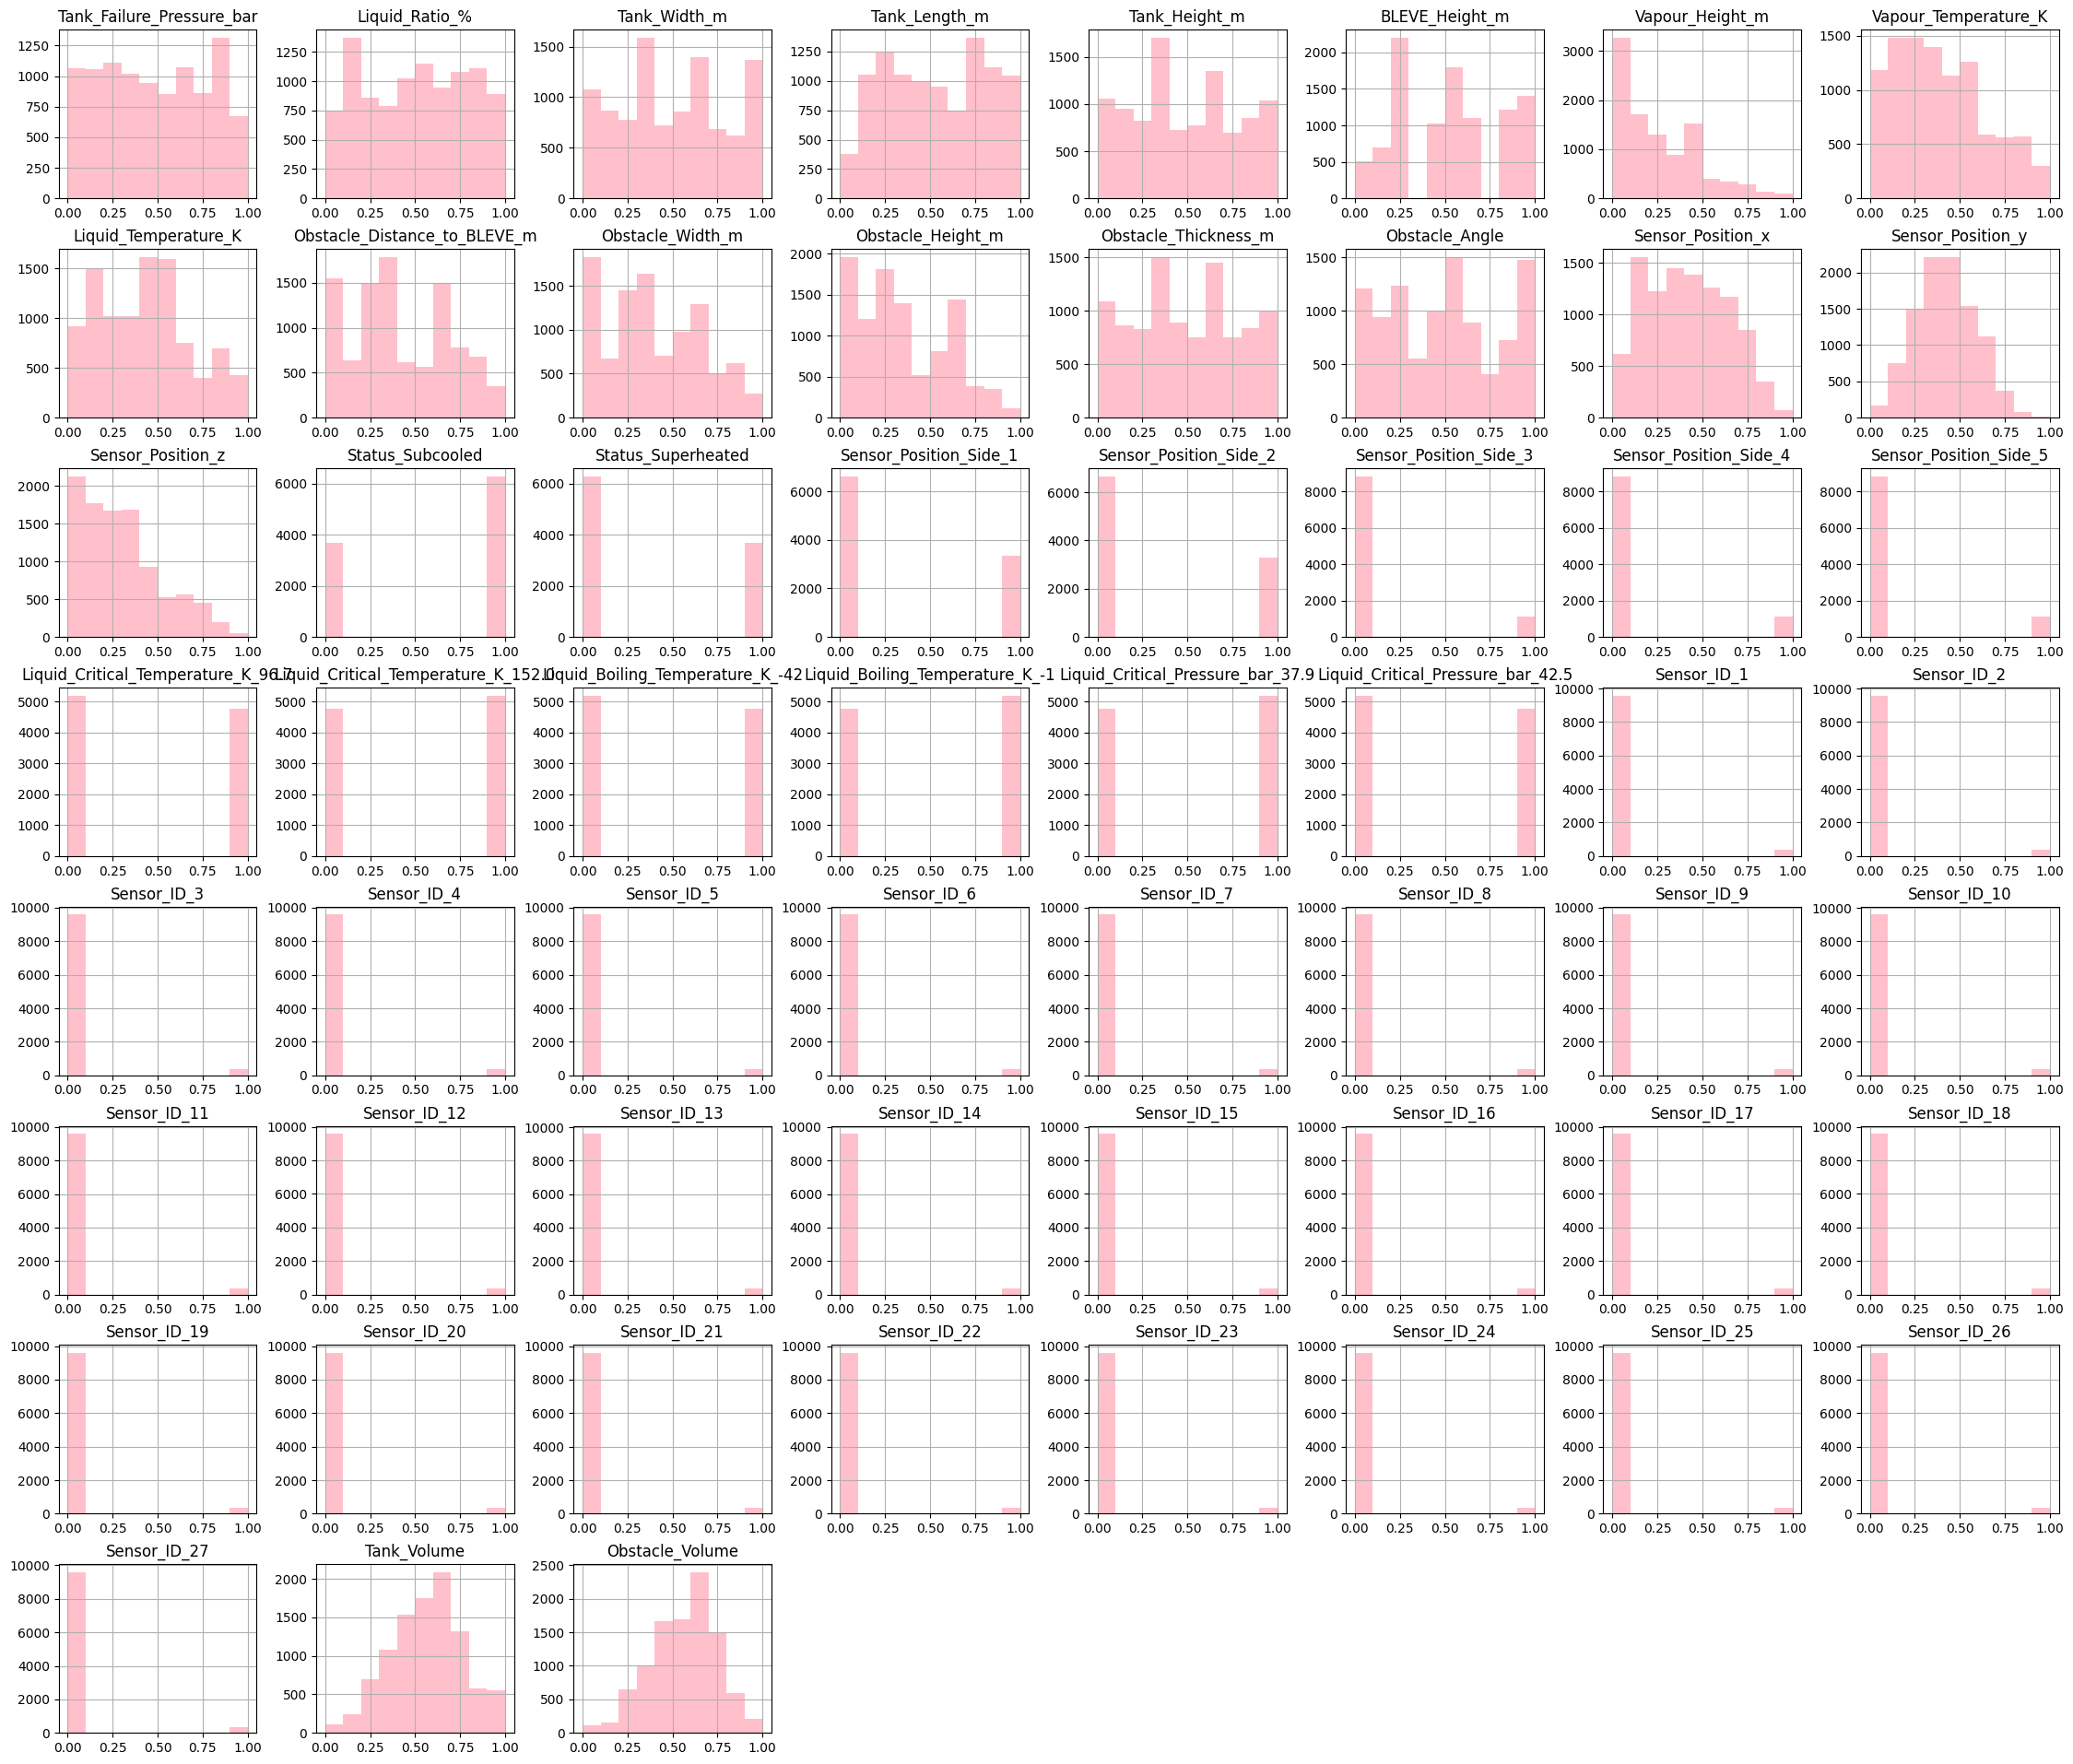

In [73]:
from sklearn.preprocessing import MinMaxScaler

#MIN MAX ON X_training and X-testing
scaler = MinMaxScaler().fit(X_training)
X_train_normalized_minmax = scaler.transform(X_training)
X_test_normalized_minmax = scaler.transform(X_testing)

#CONVERTING INTO DATA FRAME
X_train_normalized_minmax = pd.DataFrame(X_train_normalized_minmax, columns=X_training.columns)
X_test_normalized_minmax = pd.DataFrame(X_test_normalized_minmax, columns=X_testing.columns)

#PLOTING HISTOGRAMS
df_minmax = pd.DataFrame(X_train_normalized_minmax)
df_minmax.hist(figsize=(28,24), bins=10, color='pink')

In [41]:
from sklearn.model_selection import train_test_split

#SPLITTING TRAIN DATASET FOR TRAINING AND VALIDATION
X_train, X_val, y_train, y_val = train_test_split(X_train_normalized_minmax,
                                                    y_training,
                                                    test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,  mean_absolute_percentage_error

#LINEAR REGRESSION MODEL
linear_reg_model = LinearRegression()

#FITTING MODEL ON TRAINING
linear_reg_model.fit(X_train, y_train)

#MAKING PREDICTIONS ON TRAINING
y_pred_linear = linear_reg_model.predict(X_val)

#REGRESSION METRICS
mse_linear = mean_squared_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)
mae_linear = mean_absolute_error(y_val, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_val, y_pred_linear)

#PRINTING RESULTS
print("Linear MSE:", mse_linear)
print("Linear R^2 Score:", r2_linear)
print("Linear MAE:", mae_linear)
print("Linear MAPE:", mape_linear)

Linear MSE: 0.08423125576813216
Linear R^2 Score: 0.911857034812445
Linear MAE: 0.22882055905265689
Linear MAPE: 0.5685444225282785


PREDICTION MODELS : LASSO MODELING

In [43]:
from sklearn.linear_model import LassoCV
import numpy as np

#APPLYING LASSO
lasso = LassoCV(cv=10, random_state=42, alphas=np.logspace(-4, 4, 20))

#FITTING LASSO ON TRAINING DATA
lasso.fit(X_train, y_train)

#PRINTING BEST ALPHA
print(f"Best alpha: {lasso.alpha_}")

#UNDERSTANDING OF COEFFICIENTS
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)

#NON ZERO FEATURES 
important_features = lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)
print("Important features based on LassoCV:")
print(important_features)

Best alpha: 0.0001
Important features based on LassoCV:
Tank_Volume                           2.091459e+00
Tank_Failure_Pressure_bar             8.637952e-01
Sensor_Position_Side_2                8.339825e-01
Vapour_Height_m                       6.059573e-01
Sensor_ID_3                           4.563805e-01
Sensor_ID_9                           3.293966e-01
Sensor_Position_Side_3                2.788120e-01
Sensor_ID_14                          1.796191e-01
Sensor_ID_13                          1.733192e-01
Sensor_ID_2                           1.423816e-01
Sensor_ID_15                          1.251421e-01
Liquid_Temperature_K                  1.173771e-01
Sensor_ID_27                          1.073577e-01
Sensor_ID_20                          6.589527e-02
Obstacle_Volume                       6.019278e-02
Obstacle_Angle                        5.140154e-02
Sensor_ID_6                           4.044421e-02
Liquid_Critical_Temperature_K_96.7    3.629929e-02
Sensor_ID_21              

In [44]:
#EXTRACTING IMPORTANT FEATURES
X_train_important = X_train.loc[:, important_features.index]
X_val_important = X_val.loc[:, important_features.index]

#RE_TRAIN LINEAR REGRESSION MODEL WITH NEW FEATURES
lr_model_important = LinearRegression()
lr_model_important.fit(X_train_important, y_train)

#PREDICTION WITH IMPORTANT FEATURES
y_pred_lasso = lr_model_important.predict(X_val_important)

print('Predicted Value: ', y_pred_lasso[0])
print('Actual Value: ', y_val[0])

mse_important = mean_squared_error(y_val, y_pred_lasso)
r2_important = r2_score(y_val, y_pred_lasso)
mae_important = mean_absolute_error(y_val, y_pred_lasso)
mape_important = mean_absolute_percentage_error(y_val, y_pred_lasso)

print("MSE with important features:", mse_important)
print("R^2 Score with important features:", r2_important)
print("MAE with important features:", mae_important)
print("MAPE with important features:", mape_important)

Predicted Value:  -1.2075257546903946
Actual Value:  -1.6097940258349512
MSE with important features: 0.0842289117139212
R^2 Score with important features: 0.9118594877248091
MAE with important features: 0.22882873208734394
MAPE with important features: 0.5682414105164059


In [45]:
X_testing_important = X_test_normalized_minmax.loc[:, important_features.index]

In [46]:
#PREDICTION USING LASSO
y_pred_lasso = lr_model_important.predict(X_testing_important)

#REVERSE LOG TRANSFORMATION
y_pred_original = np.exp(y_pred_lasso)

#DATA FRAME WITH PREDICTIONS
predictions_df = pd.DataFrame({'ID': test_index, 'Target Pressure (bar)': y_pred_original})

#CSV FILE
predictions_df.to_csv('predictions_lasso.csv', index=False)
print(predictions_df)

        ID  Target Pressure (bar)
0        0               0.386981
1        1               0.402823
2        2               0.495570
3        3               0.262626
4        4               0.261768
...    ...                    ...
3198  3198               0.578142
3199  3199               0.430292
3200  3200               0.301346
3201  3201               0.387646
3202  3202               0.292840

[3203 rows x 2 columns]


RANDOM FOREST MODELING

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

#STARTING WITH RANDOM FOREST
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

#MODEL FIT TO TRAINING
random_forest_model.fit(X_train, y_train)

#PREDICTION ON VALIDATION
y_pred_random_forest = random_forest_model.predict(X_val)

#METRICS RANDOM FOREST
r2_random_forest = r2_score(y_val, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_val, y_pred_random_forest)
mae_random_forest = mean_absolute_error(y_val, y_pred_random_forest)
mape_random_forest = mean_absolute_percentage_error(y_val, y_pred_random_forest)

print("Random Forest MSE:", mse_random_forest)
print("Random Forest R^2 Score:", r2_random_forest)
print("Random Forest MAE:", mae_random_forest)
print("Random Forest MAPE:", mape_random_forest)

Random Forest MSE: 0.037726372943058674
Random Forest R^2 Score: 0.9605216098626559
Random Forest MAE: 0.14635833617035315
Random Forest MAPE: 0.4566978659362269


In [49]:
#MAKING PREDICTION ON TEST DATA WITH RANDOM FOREST
y_pred_rf = random_forest_model.predict(X_test_normalized_minmax)

#REVERSE LOG TRANSFORMATION
y_pred_rf_original = np.exp(y_pred_rf)

#DATA FRAME WITH PREDICTIONS
predictions_rf_df = pd.DataFrame({'ID': X_testing.index, 'Target Pressure (bar)': y_pred_rf_original})

#CSV FILE
predictions_rf_df.to_csv('predictions_rf.csv', index=False)
print(predictions_rf_df)

        ID  Target Pressure (bar)
0        0               0.238774
1        1               0.243741
2        2               0.318325
3        3               0.278738
4        4               0.252231
...    ...                    ...
3198  3198               0.756617
3199  3199               0.600766
3200  3200               0.481097
3201  3201               0.364708
3202  3202               0.319534

[3203 rows x 2 columns]


NEURAL NETWORK MODELING

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error

#STARTING WITH NEURAL NETWORK MODEL
neural_network_model = MLPRegressor(max_iter=1000, random_state=42)

#HYPERPARAMETER GRID TUNING
param_grid = {
    'hidden_layer_sizes': [(200, 100), (200,100,50) ],
    'activation': ['tanh'],
    'alpha': [0.00001 ,0.0001, 0.001, 0.01, 0.1]
}

#CROSS-VALIDATION THROUGH GRIDSEARCH
grid_search = GridSearchCV(neural_network_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

#EVALUATING BEST NEURAL NETWORK MODEL
best_neural_network = grid_search.best_estimator_

#EVALUATING BEST SVR MODEL ON VALIDATION
y_pred_nn = best_neural_network.predict(X_val)

#METRICS
mse_nn = mean_squared_error(y_val, y_pred_nn)
mape_nn = mean_absolute_percentage_error(y_val, y_pred_nn)
r2_nn = r2_score(y_val, y_pred_nn)
mae_nn = mean_absolute_error(y_val, y_pred_nn)

print("Neural Network MSE:", mse_nn)
print("Neural Network MAPE:", mape_nn)
print("Neural Network R^2 Score:", r2_nn)
print("Neural Network MAE Score:", mae_nn)

Neural Network MSE: 0.017269541363137783
Neural Network MAPE: 0.2699913918162237
Neural Network R^2 Score: 0.9819284591058893
Neural Network MAE Score: 0.09922086690496645


In [51]:
#PREDICTION ON TEST DATA
y_pred_nn_test = best_neural_network.predict(X_test_normalized_minmax)

#REVERSE LOG TRANSFORMATION
y_pred_nn_original = np.exp(y_pred_nn_test)

#DATA FRAME WITH PREDICTIONS
predictions_nn_df = pd.DataFrame({'ID': X_testing.index, 'Target Pressure (bar)': y_pred_nn_original})

#CSV FILE
predictions_nn_df.to_csv('predictions_nn.csv', index=False)
print(predictions_nn_df)

        ID  Target Pressure (bar)
0        0               0.313318
1        1               0.311950
2        2               0.510882
3        3               0.527108
4        4               0.417779
...    ...                    ...
3198  3198               0.509788
3199  3199               0.315196
3200  3200               0.281988
3201  3201               0.354433
3202  3202               0.232268

[3203 rows x 2 columns]


MODEL INTERPRETATION 

In [52]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


SHAP

PermutationExplainer explainer: 1992it [17:28,  1.90it/s]                          


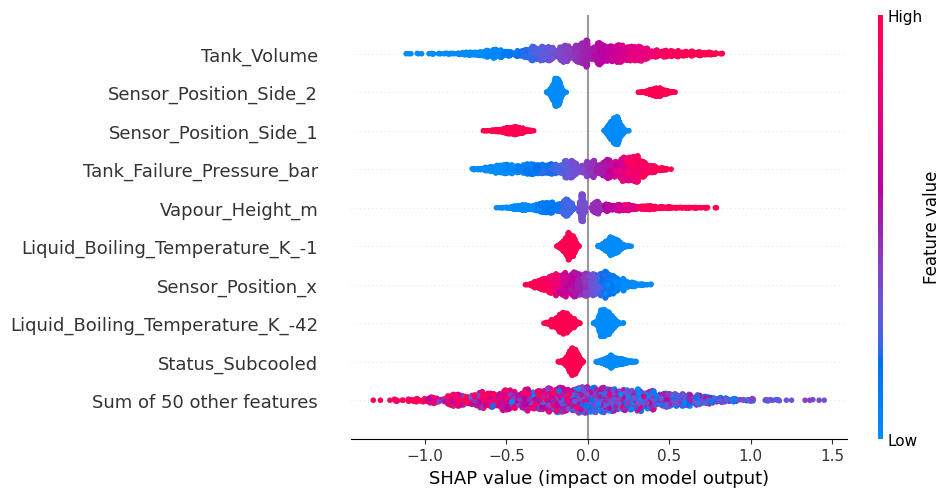

In [53]:
import shap
#APPLYING SHAP ON NEURAL NETWORK MODEL
nn_explainer = shap.Explainer(best_neural_network.predict, X_train)
nn_shap_values = nn_explainer(X_val)
shap.plots.beeswarm(nn_shap_values)

Interpretation:

On the plot above, the Y axis represents the features used in the model. Where the x axis represents the value impact scale. The graph has two colour tone with different fades respresenting as blue and red. as per the colour grade, the feature intensity can be seen.

The features which have the larger spread are the ones which influence more. On the other hand the features with less spread have limited influence on the model.

Precisely the points that are closer to each other shows that the impact on the model is in a particular manner.

PARTIAL DEPENDENCY PLOT

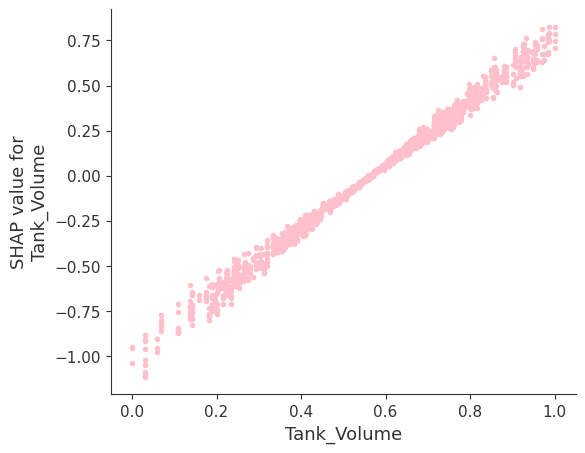

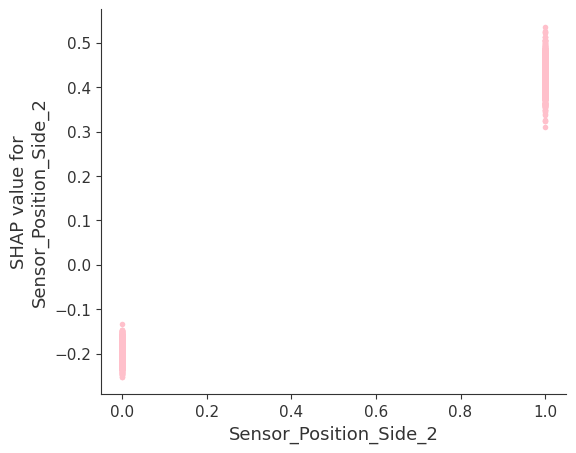

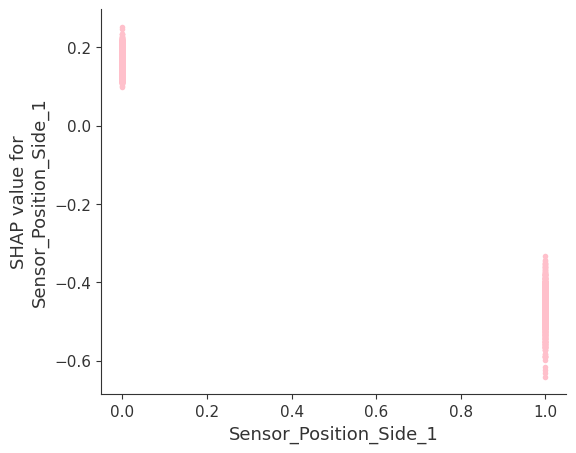

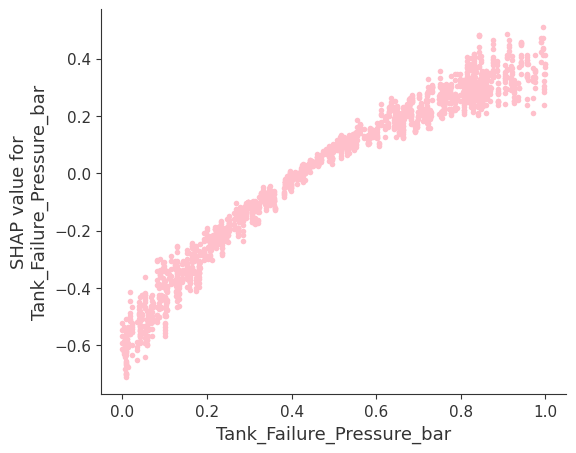

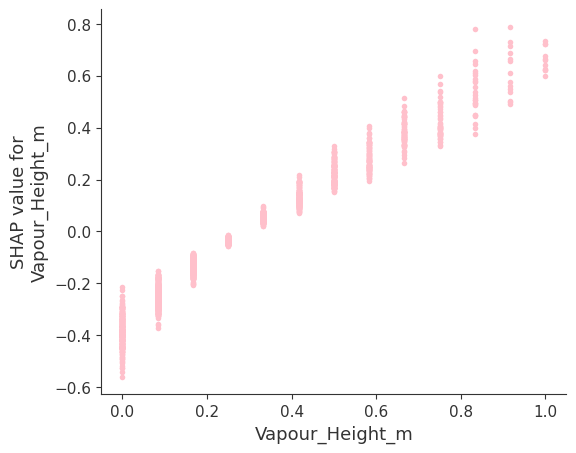

In [55]:
shap_values = nn_shap_values.values

#MEAN ABSOLUTE VALUES FOR EACH SHAP FEATURE
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

#TOP FIVE FEATURES
top_features_indices = np.argsort(mean_abs_shap_values)[::-1][:5]
top_features = X_val.columns[top_features_indices]

#PDP PLOTS
for feature in top_features:
    shap.dependence_plot(feature, shap_values, X_val, interaction_index=None, color="PINK") 
    plt.show()


Interpretation:

The first graph represents the SHAP value for tank volume and tank volume. The scatterplot represents that as the tank volume increases its SHAP value also increases respectively. Therefore, the graph formed is linear.

The second graph represents SHAP value for sensor positions side 2 and sensor position side 2. The above scatterplot depict that values are binary, therefore the values are between zero and one. When the sensor rate is zero, most of the time the SHAP values are negative. However, when the sensor state is one, mostly the SHAP values are positive.

The third graph represents the relationship between the SHAP sensor position one and sensor position one. It can be clearly seen that the values are binary, the same as the previous plot. When the sensor status is zero, mostly the values of sharp are positive. However, when the sensor state is one values are mostly negative and clustered below -0.2. The relationship is inversely affected. Hence, the pattern indicates that these features might be controlling aspects opposing from the system being modelled.

The fourth scatterplot shows the relationship between target failure pressure bar and the SHAP values for it. There is a linear relationship between them showcasing that the lowest figures decreases the models prediction. However, the higher values increases the models prediction.

The last graph represents the relationship between SHAP value for vapour height and vapour height. We can clearly see that at the beginning of the graph the SHAP values are negative. This represents that they negatively impact the models prediction. However, later in the graph the shop values are moving towards more positivity and showing transition in the models prediction. Overall this feature has an important impact on the model at different levels.

FEATURE IMPORTANCE

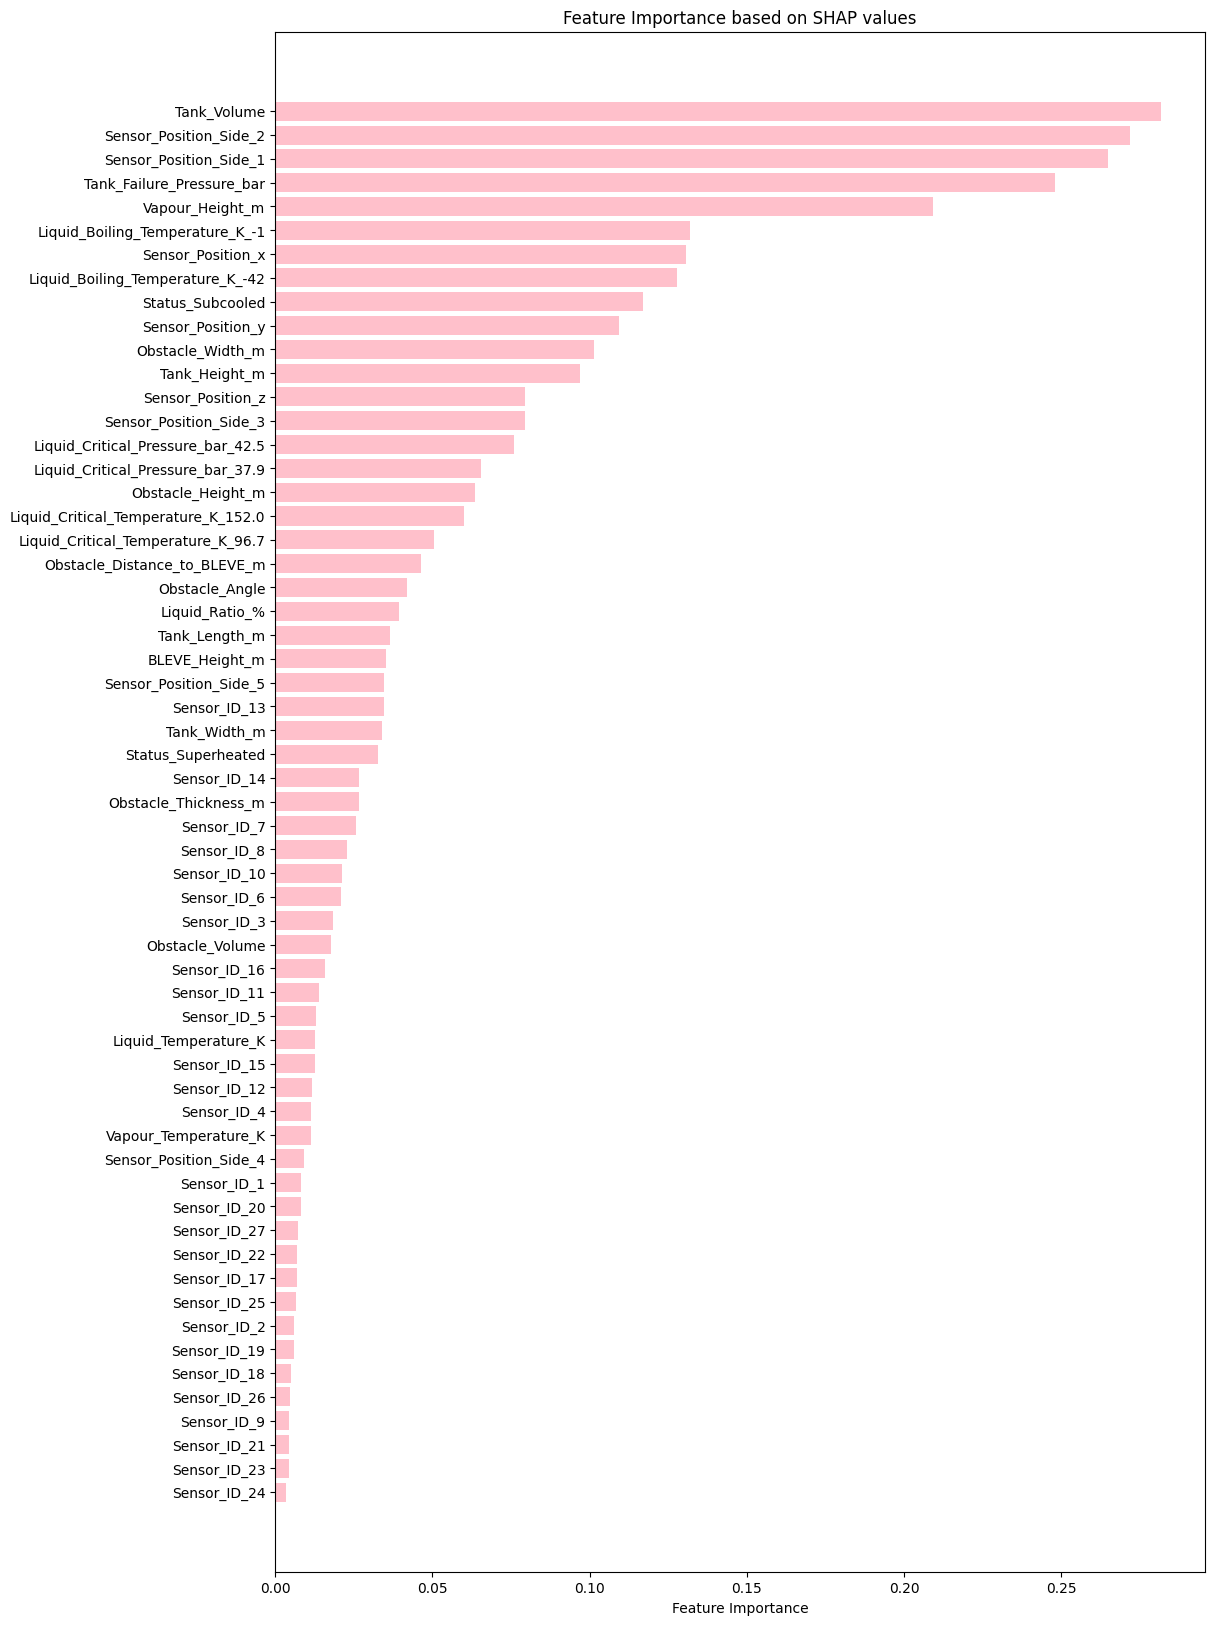

In [58]:
#MEAN ABSOLUTE VALUES FOR EACH SHAP FEATURE
mean_abs_shap_values = np.abs(nn_shap_values.values).mean(axis=0)

#FEATURE NAMES
feature_names = X_val.columns

#STOE FEATURE NAMES
feature_importance = dict(zip(feature_names, mean_abs_shap_values))

#REORDERING VARIABLES
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=False))

#BAR CHART
plt.figure(figsize=(12, 20))
plt.barh(range(len(sorted_feature_importance)), list(sorted_feature_importance.values()), align='center', color='pink')
plt.yticks(range(len(sorted_feature_importance)), list(sorted_feature_importance.keys()))
plt.xlabel('Feature Importance')
plt.title('Feature Importance based on SHAP values')
plt.show()

Interpretation:

The above bar chart represents the contribution of each feature to the actual prediction model. It is evident that the most important feature here is tank volume, whereas the least important feature is sensor ID 24. This plot is significant for optimisation for further use in data collection and model interpretation methods.

FEATURE INTERACTION PLOT

In [59]:
#CORRELATION MATRIX
correlation_matrix = np.corrcoef(nn_shap_values.values, rowvar=False)
correlation_matrix[np.tril_indices(correlation_matrix.shape[0])] = -1

#INDICES OF HIGHEST CORRELATED FEATURES
max_indices = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)
feature1_idx, feature2_idx = max_indices

feature_names = X_val.columns

print("First pair of most correlated features:")
print(f"{feature_names[feature1_idx]} and {feature_names[feature2_idx]}")

#THE NEW PAIR BY MASKING OUT PREVIOUS
correlation_matrix[feature1_idx, feature2_idx] = -1
second_max_indices = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)
feature3_idx, feature4_idx = second_max_indices

print("\nSecond pair of most correlated features:")
print(f"{feature_names[feature3_idx]} and {feature_names[feature4_idx]}")

First pair of most correlated features:
Liquid_Boiling_Temperature_K_-42 and Liquid_Critical_Pressure_bar_42.5

Second pair of most correlated features:
Liquid_Critical_Temperature_K_152.0 and Liquid_Boiling_Temperature_K_-1


In [60]:
#VALUES OF FEATURES OF FIRST PAIR
first_feature_values = X_val.iloc[:, [feature1_idx, feature2_idx]]

#VALUES OF FEATURES OF SECOND PAIR
second_feature_values = X_val.iloc[:, [feature3_idx, feature4_idx]]

print("\nValues of the first pair of most correlated features:")
print(first_feature_values)

print("\nValues of the second pair of most correlated features:")
print(second_feature_values)



Values of the first pair of most correlated features:
      Liquid_Boiling_Temperature_K_-42  Liquid_Critical_Pressure_bar_42.5
2935                               1.0                                1.0
9548                               1.0                                1.0
7136                               1.0                                1.0
1253                               0.0                                0.0
3438                               0.0                                0.0
...                                ...                                ...
9384                               1.0                                1.0
3635                               0.0                                0.0
6098                               0.0                                0.0
449                                1.0                                1.0
4055                               0.0                                0.0

[1991 rows x 2 columns]

Values of the second pair of mo

In [63]:
X_val

Tank_Failure_Pressure_bar  Liquid_Ratio_%  Tank_Width_m  Tank_Length_m  \
2935                   0.495935        0.201821      0.384615       0.148936   
9548                   0.655827        0.035810      0.538462       0.063830   
7136                   0.970190        0.747509      0.384615       0.361702   
1253                   0.067751        0.506143      0.538462       0.936170   
3438                   0.181572        0.052242      0.923077       0.744681   
...                         ...             ...           ...            ...   
9384                   0.000000        0.549064      0.615385       0.234043   
3635                   0.487805        0.307157      0.384615       0.787234   
6098                   0.444444        0.744802      0.000000       0.744681   
449                    0.807588        0.738933      0.692308       0.382979   
4055                   0.127371        0.126931      0.923077       0.404255   

      Tank_Height_m  BLEVE_Height_m  Vapour_Height_m  Vapour_Temperature_K  \
2935       0.538462             0.4         0.500000              0.309581   
9548       0.307692             0.4         0.333333              0.351435   
7136       0.230769             0.8         0.083333              0.133172   
1253       0.461538             1.0         0.250000              0.347976   
3438       0.076923             0.3         0.166667              0.763750   
...             ...             ...              ...                   ...   
9384       0.769231             0.2         0.416667              0.167762   
3635       0.230769             0.3         0.166667              0.777932   
6098       0.846154             1.0         0.250000              0.720166   
449        0.076923             0.9         0.000000              0.107575   
4055       0.153846             0.3         0.250000              0.705984   

      Liquid_Temperature_K  Obstacle_Distance_to_BLEVE_m  Obstacle_Width_m  \
2935              0.177396                      0.533333          0.066667   
9548              0.374106                      0.200000          0.400000   
7136              0.414878                      0.200000          0.533333   
1253              0.191702                      0.466667          0.266667   
3438              0.904864                      0.066667          0.133333   
...                    ...                           ...               ...   
9384              0.113019                      0.466667          0.466667   
3635              0.745351                      0.133333          0.666667   
6098              0.483548                      0.133333          0.333333   
449               0.459227                      0.666667          0.066667   
4055              0.537196                      0.466667          0.200000   

      Obstacle_Height_m  Obstacle_Thickness_m  Obstacle_Angle  \
2935           0.666667              0.461538        0.733333   
9548           0.666667              0.538462        0.633333   
7136           0.466667              0.076923        0.333333   
1253           0.133333              0.153846        0.966667   
3438           0.400000              0.384615        0.166667   
...                 ...                   ...             ...   
9384           0.600000              0.307692        0.466667   
3635           0.333333              0.923077        0.366667   
6098           0.600000              0.384615        0.600000   
449            0.200000              0.384615        0.066667   
4055           0.466667              0.230769        0.466667   

      Sensor_Position_x  Sensor_Position_y  Sensor_Position_z  \
2935           0.502688           0.426573           0.076923   
9548           0.250000           0.564685           0.748718   
7136           0.225806           0.365385           0.553846   
1253           0.462366           0.547203           0.266667   
3438           0.198925           0.417832           0.548718   


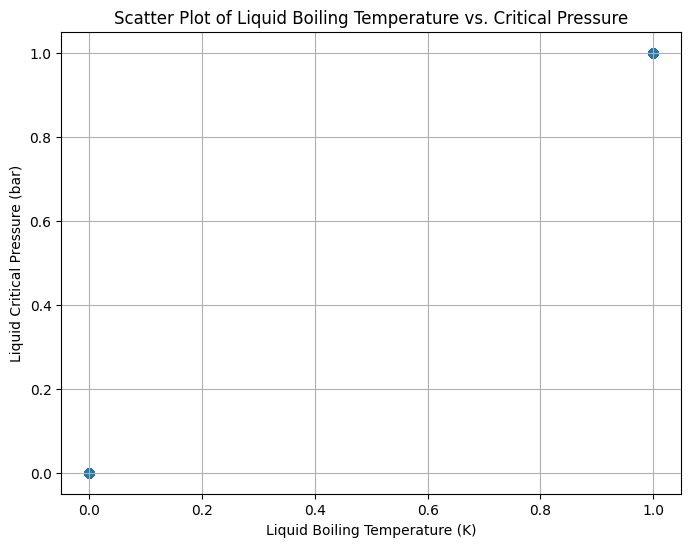

In [64]:
import matplotlib.pyplot as plt

boiling_temperature = X_val['Liquid_Boiling_Temperature_K_-42']
critical_pressure = X_val['Liquid_Critical_Pressure_bar_42.5']

# CREATING SCATTER PLOT
plt.figure(figsize=(8, 6))
plt.scatter(boiling_temperature, critical_pressure, alpha=0.5)
plt.title("Scatter Plot of Liquid Boiling Temperature vs. Critical Pressure")
plt.xlabel("Liquid Boiling Temperature (K)")
plt.ylabel("Liquid Critical Pressure (bar)")
plt.grid(True)
plt.show()


Interpretation:

The above plots shows the binary datasets are strongly positively correlated. It is evident that when the Liquid Boiling temperature is 0 then Liquid Critical Pressure is also 0 and vice versa.

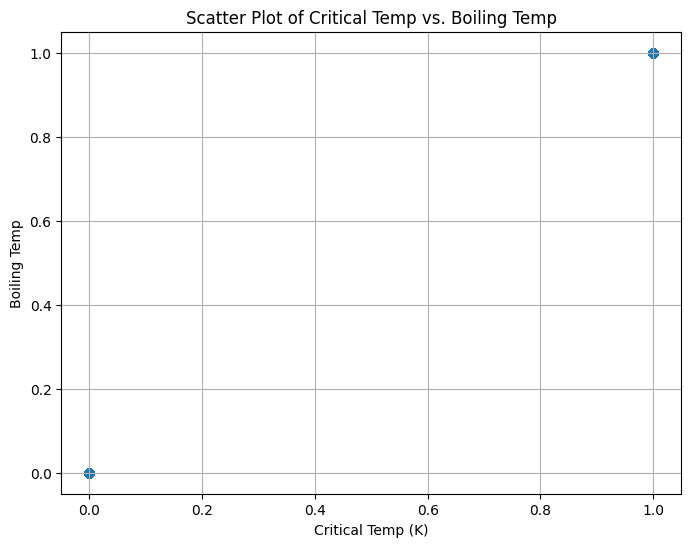

In [65]:
import matplotlib.pyplot as plt

critical_temp = X_val['Liquid_Critical_Temperature_K_152.0']
Boiling_temp2 = X_val['Liquid_Boiling_Temperature_K_-1']

# CREATING SCATTER PLOT
plt.figure(figsize=(8, 6))
plt.scatter(critical_temp, Boiling_temp2, alpha=0.5)
plt.title("Scatter Plot of Critical Temp vs. Boiling Temp")
plt.xlabel("Critical Temp (K)")
plt.ylabel("Boiling Temp")
plt.grid(True)
plt.show()

Interpretation:

The above plots the binary dataset and are strongly positively correlated. When the Boiling temperature is 0 then the Critical temperature is also 0 and vice versa.

LIME

In [66]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


LOWEST PREDICTION IN TERMS OF LIME

In [67]:
import lime.lime_tabular
import lime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


#PREDICTION USING TRAINED MODEL
predictions = best_neural_network.predict(X_val)

#INDEX OF LOWEST PRESSURE VALUE
lowest_pressure_index = np.argmin(predictions)

#DATA INSTANCE WITH LOWEST PRESSURE VALUE
instance_with_lowest_pressure = X_val.iloc[[lowest_pressure_index]]

#LIME EXPLAINER
explainer = lime.lime_tabular.LimeTabularExplainer(X_val.value, feature_names=X_val.column, mode="regression")

explanation = explainer.explain_instance(instance_with_lowest_pressure.values[0], best_neural_network.predict,num_features=len(X_val.columns))
#VISUALIZING
explanation.show_in_notebook()

Interpretation:

The model's lowest prediction is displayed in the LIME output above. The chart shows that the model's lowest prediction is -3.81, ranging from -4.16 to 1.41. The bar graph displays the influencing features from top to bottom; negatively influenced features are on the left, while positively influenced features are on the right. Furthermore, the features exhibit a greater tendency towards negativity and a lower tendency towards positivity, indicating corresponding effects on the model. The feature values are shown in tabular form on the right.



HIGHEST PREDICTION IN TERMS OF LIME

In [68]:
#INDEX OF HIGHEST PRESSURE VALUE
highest_pressure_index = np.argmax(predictions)

#DATA INSTANCE WITH HIGHEST PRESSURE VALUE
instance_with_highest_pressure = X_val.iloc[[highest_pressure_index]]

explanation_highest = explainer.explain_instance(instance_with_highest_pressure.values[0],
                                                  best_neural_network.predict,
                                                  num_features=len(X_val.columns))
#VISUALIZING
explanation_highest.show_in_notebook()


Interpretation:

The top model prediction is displayed in the LIME output above. The chart shows that the model's lowest prediction is 1.18, with a range of -3.96 to 1.70. The bar graph displays the influencing features from top to bottom; negatively influenced features are on the left, while positively influenced features are on the right. Furthermore, it is evident that half of the total features point in a negative direction, while the other half point in a positive direction, indicating the respective impacts on the model. The feature values are shown in tabular form on the right.



In [69]:
#ABSOLUTE PERCENTAGE ERROR
absolute_percentage_errors = np.abs((predictions - y_val) / y_val)

#INDEX OF LARGEST ERROR INDEX
largest_error_index = np.argmax(absolute_percentage_errors)

#DATA INSTANCE WITH LARGEST ERROR INDEX
instance_with_largest_error = X_val.iloc[[largest_error_index]]

explanation_largest_error = explainer.explain_instance(instance_with_largest_error.values[0],
                                                        best_neural_network.predict,
                                                        num_features=len(X_val.columns))
#VISUALIZING
explanation_largest_error.show_in_notebook()


Interpretation:

The model's lowest prediction is displayed in the LIME output above. As the bar shows, the model's lowest prediction is -0.25, falling between -4.41 and 2.46. The bar graph displays the influencing features from top to bottom; negatively influenced features are on the left, while positively influenced features are on the right. Furthermore, more positive traits and fewer negative features indicate a corresponding impact on the model. The feature values are shown in tabular form on the right.

